# Introduction

Version control repositories like CVS, Subversion or Git can be a real gold mine for software developers. They contain every change to the source code including the date (the "when"), the responsible developer (the "who"), as well as a little message that describes the intention (the "what") of a change.

In this notebook, we will analyze the evolution of `Tensorflow`. 

![](files/tensorflow_new.png)  

Tensorflow is one of the widely used libraries for implementing Machine learning and Deep Learning algorithms involving large number of mathematical operations. Tensorflow was developed by Google and it’s one of the most popular Machine Learning libraries on GitHub. Our dataset at hand contains the history of tensorflow development of 5 years (late 2015 - mid 2021). We get some insights into the work of the development efforts by -

 * Identifying the TOP 10 contributors.

* Visualizing the commits over the years.

# Reading in the dataset

The dataset was created by using the command `git log --encoding=latin-1 --pretty="%at#%aN"` in May 2021. The `latin-1` encoded text output was saved in a header-less CSV file. In this file, each row is a commit entry with the following information:

* `timestamp`: the time of the commit as a UNIX timestamp in seconds since 1970-01-01 00:00:00 (Git log placeholder `"%at"`)
* `author`: the name of the author that performed the commit (Git log placeholder `"%aN"`)

The columns are separated by the number sign `#`. 

The complete dataset is in the datasets/ directory. It is a csv file named `tensor_log.csv`.

In [1]:
# Loading in the pandas module as 'pd'
import pandas as pd

# Reading in the log file
tensor_log = pd.read_csv(
    'Tensorflowhistory.csv',
    sep='#',
    encoding='latin-1',
    header=None,
    names=['timestamp', 'author']
)

# Printing the first 5 rows
tensor_log.head()

,timestamp,author
0,1621616255,A. Unique TensorFlower
1,1621616637,TensorFlower Gardener
2,1621615550,Peter Hawkins
3,1621614591,Denis Vnukov
4,1621614845,TensorFlower Gardener


# Getting an overview

The dataset contains the information about every single code contribution (a "commit") to Tensorflow library over the last 5 years. We'll first take a look at the number of authors and their commits to the repository.

In [2]:
# calculating number of commits
number_of_commits = len(tensor_log)

# calculating number of authors
number_of_authors = len(tensor_log['author'].dropna().unique())

# printing out the results
print("%s authors committed %s code changes." % (number_of_authors, number_of_commits))

3470 authors committed 111084 code changes.


# Finding the TOP 10 contributors

There are some very important people that changed Tensorflow library very often. To see if there are any bottlenecks, we take a look at the TOP 10 authors with the most commits.

In [3]:
# Identifying the top 10 authors
top_10_authors = tensor_log['author'].value_counts().head(10)

# Listing contents of 'top_10_authors'
top_10_authors.head(10)

A. Unique TensorFlower    25882
TensorFlower Gardener      5320
Yong Tang                  1315
Shanqing Cai               1168
Derek Murray               1154
Gunhan Gulsoy              1133
Benoit Steiner             1046
Vijay Vasudevan            1039
Peter Hawkins               925
River Riddle                886
Name: author, dtype: int64

We see that the top contibutor is `A. Unique TensorFlower` & `TensorFlower Gardener`. This is because tensorflow have a unique way on managing open source support, to know more about that here's an article by [oreilly.](https://www.oreilly.com/content/how-the-tensorflow-team-handles-open-source-support/)

# Wrangling the data
For our analysis, we want to visualize the contributions over time. For this, we use the information in the timestamp column to create a time series-based column.

In [4]:
# converting the timestamp column
tensor_log['timestamp'] = pd.to_datetime(tensor_log['timestamp'], unit="s")

# summarizing the converted timestamp column
tensor_log['timestamp'].describe(datetime_is_numeric=True)

count                           111084
mean     2019-02-04 19:22:48.821190912
min                2015-11-07 00:27:58
25%                2018-01-26 02:50:39
50%         2019-04-16 19:22:16.500000
75%      2020-04-07 20:25:38.249999872
max                2021-05-21 17:03:57
Name: timestamp, dtype: object

# Grouping commits per year
To find out how the development activity has increased over time, we'll group the commits by year and count them up.

In [5]:
# Counting the no. commits per year
commits_per_year = tensor_log.groupby(
    pd.Grouper(key='timestamp', freq='AS')).count()

# Listing the first rows
commits_per_year.head()

,author
timestamp,
2015-01-01,529
2016-01-01,12032
2017-01-01,14047
2018-01-01,20706
2019-01-01,28450


# Visualizing the history of Tensorflow
Finally, we'll make a plot out of these counts to better see how the development effort on Linux has increased over the the last few years.

<AxesSubplot:title={'center':'Commits per year (Tensorflow)'}, xlabel='timestamp'>

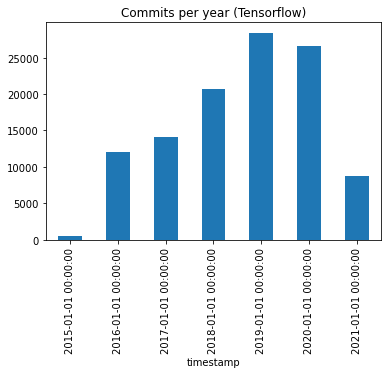

In [6]:
# Setting up plotting in Jupyter notebooks
%matplotlib inline

# plot the data
commits_per_year.plot(kind='bar', title="Commits per year (Tensorflow)", legend=False)

# Conclusion

Thanks to the solid foundation and caretaking of tensorflow team,here is no decrease of development activity at sight!</p>